# Question 4 2nd Order Initial Value Problem

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
## To output results as a nice table
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
from IPython.display import HTML
warnings.filterwarnings("ignore")
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



Consider the 2nd order initial value problem,
$$y''=-1.5y'+5.0y+e^{2t},$$
with the initial conditions
$$ y(0)=3, \text{ and } y'(0)=1. $$
The Euler midpoint method is
$$w_{i+1}=w_i+hf(t_i+\frac{h}{2},w_i+\frac{h}{2}k_1),$$
where $h$ is the stepsize and 
$$k_1=f(t_i,w_i).$$
To discretise the IVP seperate into two initial value problems
$$z'=-1.5z+5.0y+e^{2t},$$
$$y'=z,$$
and apply the midpoint method
$$z_{i+1}=z_i+h[-1.5(z_i+\frac{h}{2}k_z)+5.0(y_i+\frac{h}{2}k_y)+e^{2t_i+\frac{h}{2}}],$$
$$y_{i+1}=y_i+h[z_i+\frac{h}{2}k_z],$$
where
$$k_z=[-1.5z_i+5.0y_i+e^{2t_i}],$$
$$k_y=[z_i],$$
and $h$ is the stepsize.


In [2]:
N=5
t_end=2.0
t_start=0.0
h=((t_end-t_start)/N)

time=np.arange(t_start,t_end+h/2,h)


In [3]:
def myfun_u(t,y,dy):
    ftw=-1.5*dy+5.0*y+math.exp(2*t)
    return ftw


Plot of numerical aproximation of the solution (y_i) and the derivative (z_i):


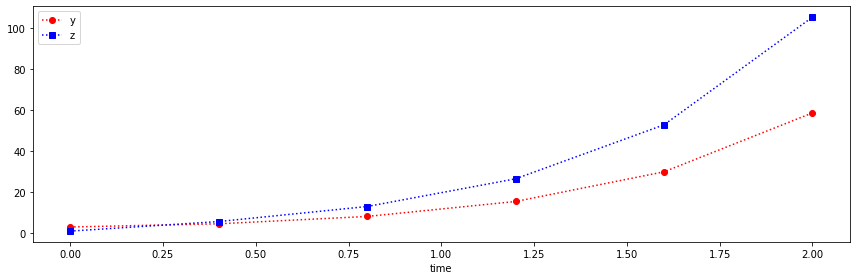

In [4]:
z=np.zeros(N+1)
k_z=np.zeros(N+1)
k_y=np.zeros(N+1)
z[0]=1
y=np.zeros(N+1)
y[0]=3
table = ListTable()
table.append(['i','time','k_y','k_z', 'y','z=dy/dt'])

for i in range (0,N):
    # Midpoint Method
    k_y[i]=z[i]
    k_z[i]=myfun_u(time[i],y[i],z[i])
 
    z[i+1]=z[i]+h*myfun_u(time[i]+h/2,y[i]+h/2*k_y[i],z[i]+h/2*k_z[i])
    y[i+1]=y[i]+h*(z[i]+h/2*k_z[i])
    table.append([i,round(time[i],3), round(k_y[i],6), round(k_z[i],6), round(y[i],6), round(z[i],6)])


i=i+1
table.append([i,round(time[i],3), 'NA', 'NA', round(y[i],6), round(z[i],6)])
    
print('Plot of numerical aproximation of the solution (y_i) and the derivative (z_i):' )
fig = plt.figure(figsize=(12,4))
plt.plot(time, y, 'r:o', label='y')
plt.plot(time, z, 'b:s', label='z')
plt.legend()
plt.xlabel('time')
plt.tight_layout()

In [5]:
print('The table below shows the results of the Euler method applied to the 2nd order IVP:')
table



The table below shows the results of the Euler method applied to the 2nd order IVP:


i,time,k_y,k_z,y,z=dy/dt
0,0.0,1.0,14.5,3.0,1.0
1,0.4,5.65673,16.540446,4.56,5.65673
2,0.8,12.988577,26.199805,8.145928,12.988577
3,1.2,26.494363,48.468347,15.437343,26.494363
4,1.6,52.831833,94.847559,29.912556,52.831833
5,2.0,NA,NA,58.633094,105.348165
